In [1]:
import pandas as pd


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [113]:
df = pd.read_csv('C:\\Users\\biola\\Downloads\\resorts_data.csv', encoding='ISO-8859-1')


In [115]:
df

,ResortName,NearestCity,StateOrProvince,PeakElevationInFeet,BaseElevationInFeet,VerticalDropInFeet,SkiableAcres,TotalTrails,TotalLifts,AvgAnnualSnowfallInInches,AdultLiftTicketPriceUSD
0,Cloudmont Resort,Mentone,Alabama,1800,1650,150,9,2,2,250,40
1,Mount Eyak,Cordova,Alaska,1200,400,800,100,10,2,350,30
2,Hilltop,Anchorage,Alaska,780,486,294,30,13,3,69,34
3,Moose Mountain,Fairbanks,Alaska,1985,685,1300,200,40,0,70,40
4,Arctic Valley,Anchorage,Alaska,4000,2500,1500,320,24,3,250,40
...,...,...,...,...,...,...,...,...,...,...,...
370,Snowy Range,Centennial,Wyoming,9663,8798,865,250,27,5,245,49
371,White Pine,Pinedale,Wyoming,9500,8450,1050,350,27,2,150,50
372,Snow King,Jackson,Wyoming,7808,6237,1571,400,32,5,175,59
373,Grand Targhee Resort,Alta,Wyoming,10121,7851,2270,2602,99,5,500,98


In [117]:
df.head()


,ResortName,NearestCity,StateOrProvince,PeakElevationInFeet,BaseElevationInFeet,VerticalDropInFeet,SkiableAcres,TotalTrails,TotalLifts,AvgAnnualSnowfallInInches,AdultLiftTicketPriceUSD
0,Cloudmont Resort,Mentone,Alabama,1800,1650,150,9,2,2,250,40
1,Mount Eyak,Cordova,Alaska,1200,400,800,100,10,2,350,30
2,Hilltop,Anchorage,Alaska,780,486,294,30,13,3,69,34
3,Moose Mountain,Fairbanks,Alaska,1985,685,1300,200,40,0,70,40
4,Arctic Valley,Anchorage,Alaska,4000,2500,1500,320,24,3,250,40


In [119]:
print(df.describe())


       PeakElevationInFeet  BaseElevationInFeet  VerticalDropInFeet  \
count           375.000000           375.000000          375.000000   
mean           4809.632000          3470.509333         1322.224000   
std            3676.439794          3071.095406         1027.521369   
min             310.000000            33.000000          100.000000   
25%            1500.000000           871.000000          500.000000   
50%            3500.000000          1820.000000         1016.000000   
75%            8015.000000          6334.000000         2000.000000   
max           13487.000000         10800.000000         5620.000000   

       SkiableAcres  TotalTrails  TotalLifts   AvgAnnualSnowfallInInches   \
count    375.000000   375.000000  375.000000                   375.000000   
mean     735.685333    48.504000    7.978667                   187.277333   
std     1219.376205    45.458442    5.988364                   132.469421   
min        6.000000     1.000000    0.000000        

In [131]:
print(df.columns)


Index(['ResortName', 'NearestCity', 'StateOrProvince', 'PeakElevationInFeet',
       'BaseElevationInFeet', 'VerticalDropInFeet', 'SkiableAcres',
       'TotalTrails', 'TotalLifts', ' AvgAnnualSnowfallInInches ',
       ' AdultLiftTicketPriceUSD ', 'Cluster'],
      dtype='object')


In [135]:
print(df.isnull().sum())


ResortName                     0
NearestCity                    0
StateOrProvince                0
PeakElevationInFeet            0
BaseElevationInFeet            0
VerticalDropInFeet             0
SkiableAcres                   0
TotalTrails                    0
TotalLifts                     0
 AvgAnnualSnowfallInInches     0
 AdultLiftTicketPriceUSD       0
Cluster                        0
dtype: int64


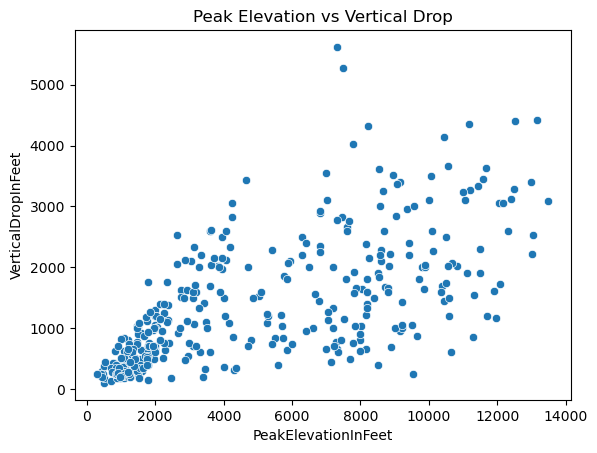

In [137]:
sns.scatterplot(x='PeakElevationInFeet', y='VerticalDropInFeet', data=df)
plt.title('Peak Elevation vs Vertical Drop')
plt.show()


In [141]:
from sklearn.cluster import KMeans


In [143]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [145]:
df_numeric_clean = df_numeric.dropna()

In [147]:
corr_matrix = df_numeric_clean.corr()


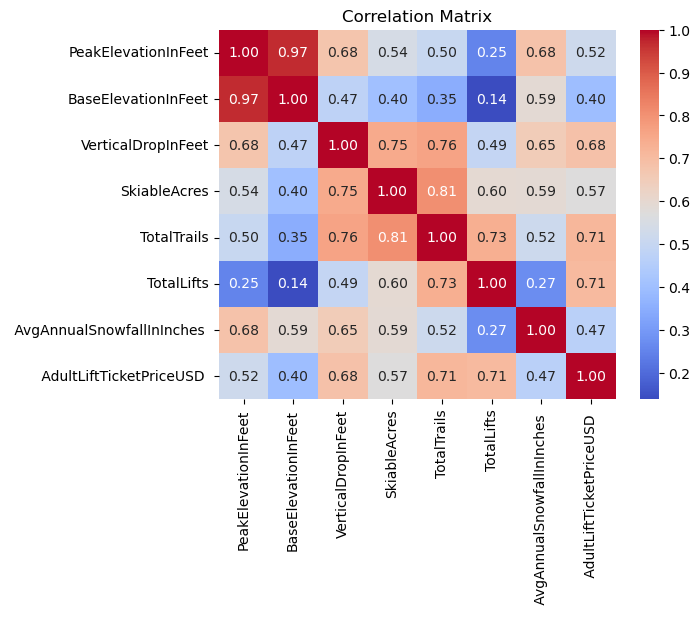

In [151]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [153]:
X = df.dropna()

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric_clean)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=df_numeric_clean.columns)
print(df_numeric_scaled.head())



   PeakElevationInFeet  BaseElevationInFeet  VerticalDropInFeet  SkiableAcres  \
0            -0.819720            -0.593580           -1.142351     -0.596745   
1            -0.983140            -1.001145           -0.508916     -0.522017   
2            -1.097533            -0.973104           -1.002021     -0.579500   
3            -0.769333            -0.908220           -0.021658     -0.439898   
4            -0.220516            -0.316436            0.173246     -0.341355   

   TotalTrails  TotalLifts   AvgAnnualSnowfallInInches   \
0    -1.024367   -0.999714                     0.474120   
1    -0.848147   -0.999714                     1.230020   
2    -0.782065   -0.832501                    -0.894058   
3    -0.187322   -1.334142                    -0.886499   
4    -0.539762   -0.832501                     0.474120   

    AdultLiftTicketPriceUSD   
0                  -0.845483  
1                  -1.130247  
2                  -1.016342  
3                  -0.845483  
4  

In [196]:
inertia = []



In [186]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [198]:
for k in range(1, 11):
    print(f"Running K-Means with {k} clusters")  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric_scaled)  
    inertia.append(kmeans.inertia_)  

Running K-Means with 1 clusters
Running K-Means with 2 clusters
Running K-Means with 3 clusters
Running K-Means with 4 clusters
Running K-Means with 5 clusters
Running K-Means with 6 clusters
Running K-Means with 7 clusters
Running K-Means with 8 clusters
Running K-Means with 9 clusters
Running K-Means with 10 clusters


In [200]:
print("Inertia values:", inertia)

Inertia values: [3000.000000000001, 1705.655338796727, 1262.5392954868194, 1055.5230984397542, 927.321575669333, 841.6485987107247, 767.7029407626989, 712.8366516643508, 658.3081297874212, 630.0780773210149]


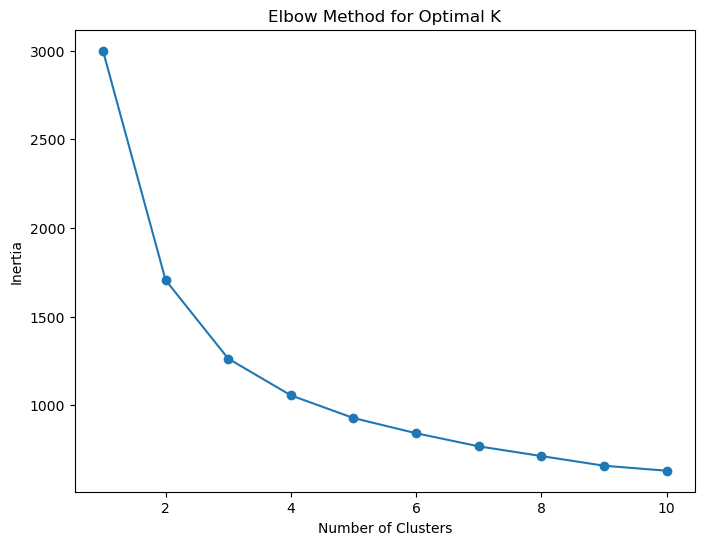

In [202]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
print(df_numeric_imputed.isna().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [67]:
kmeans = KMeans(n_clusters=3)

In [69]:
df['Cluster'] = kmeans.fit_predict(df_numeric_imputed)

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,1


In [75]:
from sklearn.preprocessing import StandardScaler



In [77]:
scaler = StandardScaler()

In [79]:
df_numeric_scaled = scaler.fit_transform(df_numeric_imputed)

In [81]:
print(df_numeric_scaled[:5])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97522785 -0.9744286
  -0.97703285  2.34476576  2.12963148]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.3550882   0.86143887
   1.66996103  2.33223796  1.31415614]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82973217 -0.82077735
  -0.84363692  1.7826994   1.25869341]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.72239929 -0.76602806
  -0.73378144  0.93296751  1.16510007]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61506641 -0.75984669
  -0.62915718 -0.012881    1.17289952]]


In [83]:
import matplotlib.pyplot as plt

In [85]:
from sklearn.cluster import KMeans


In [87]:
wcss = []

In [97]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric_scaled)
    wcss.append(kmeans.inertia_)

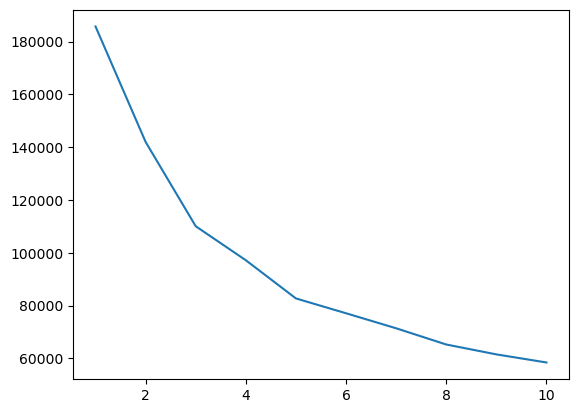

In [99]:
plt.plot(range(1, 11), wcss)

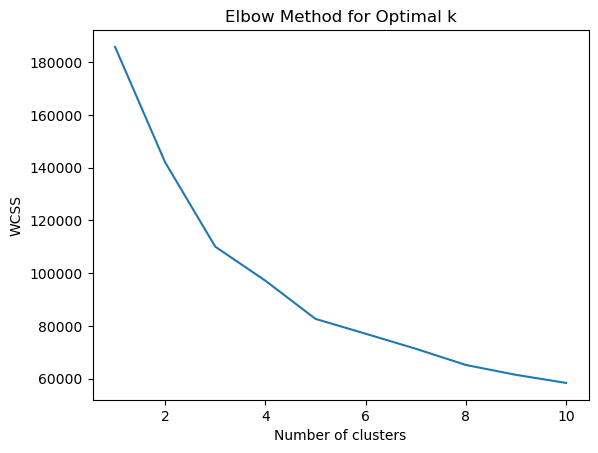

In [101]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
optimal_k = 3


In [105]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_numeric_scaled)


In [107]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

   Cluster  
0        1  
1        2  
2        1  
3        1  
4  

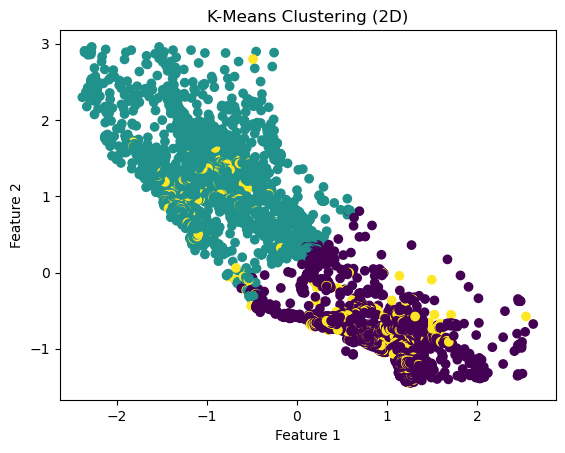

In [109]:
plt.scatter(df_numeric_scaled[:, 0], df_numeric_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [111]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.563324
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.639830
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,2.000000


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])  


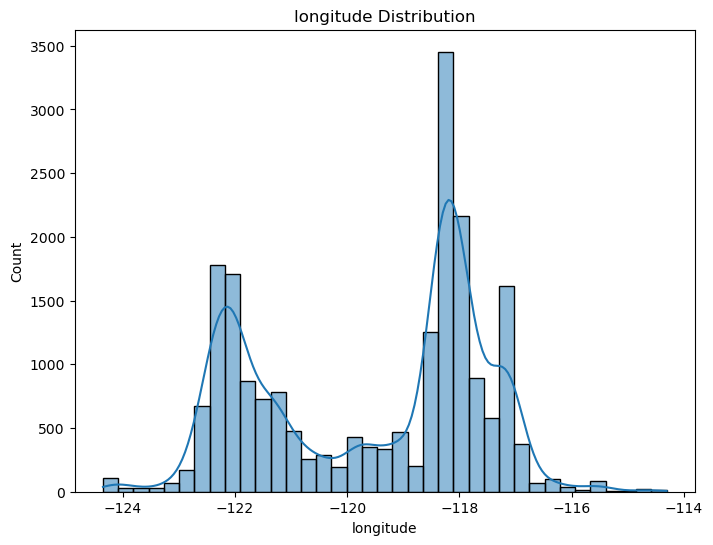

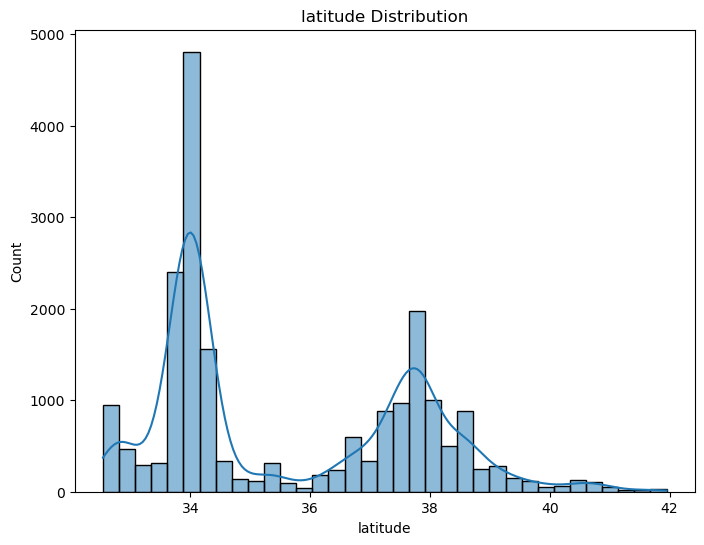

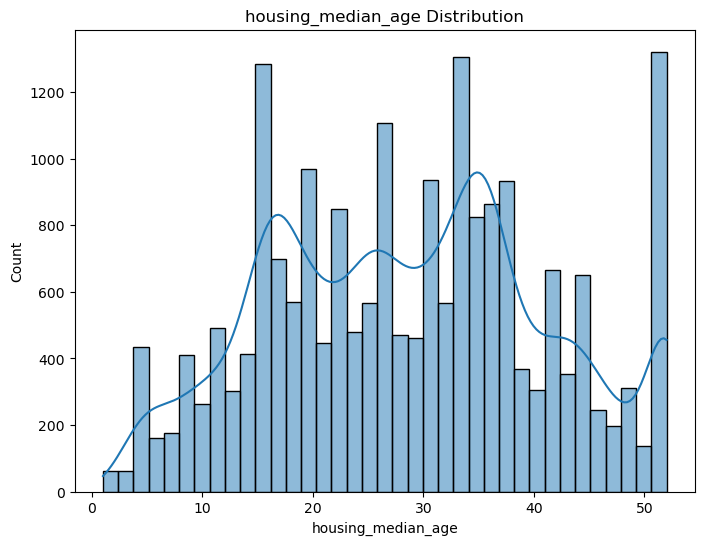

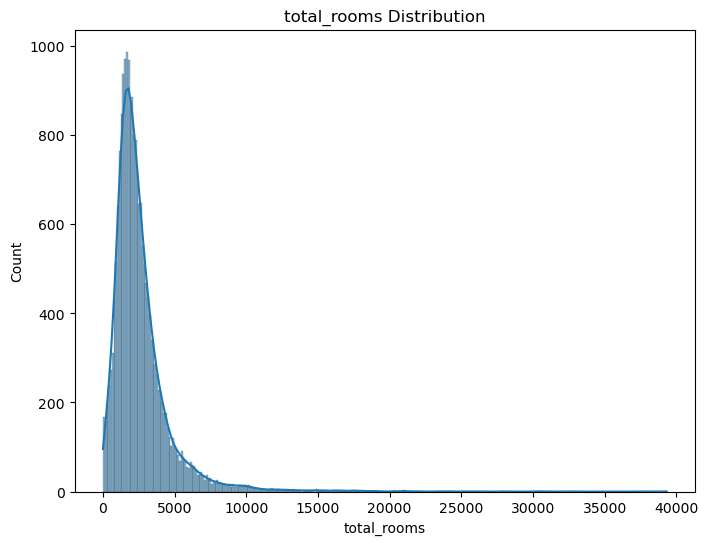

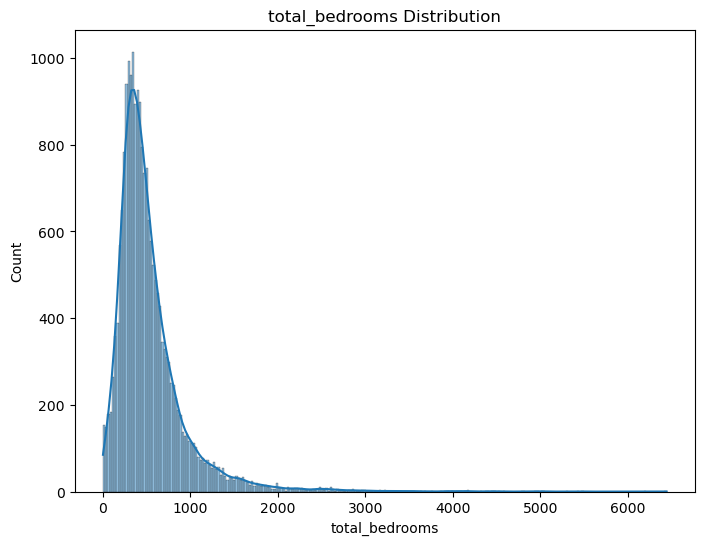

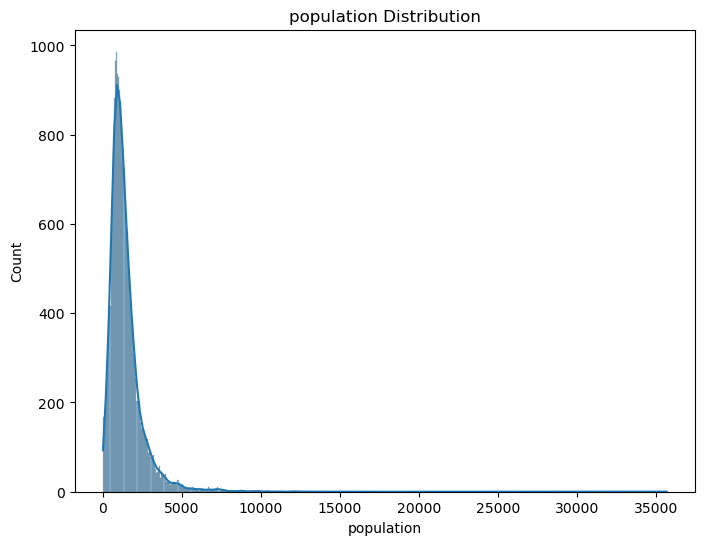

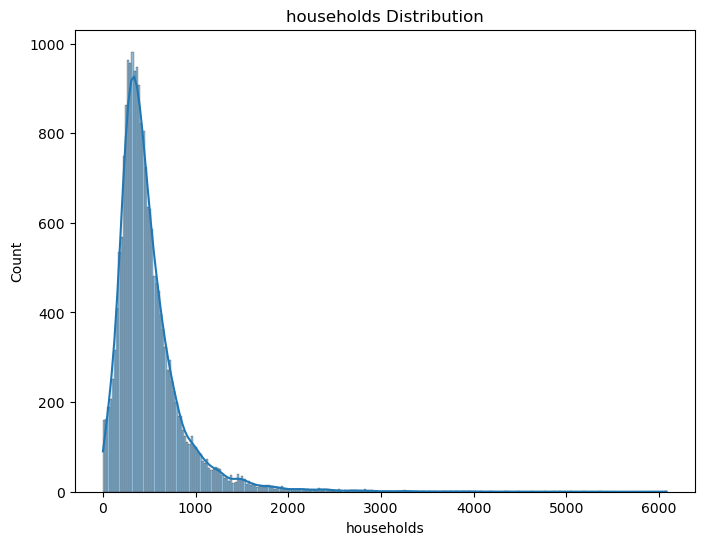

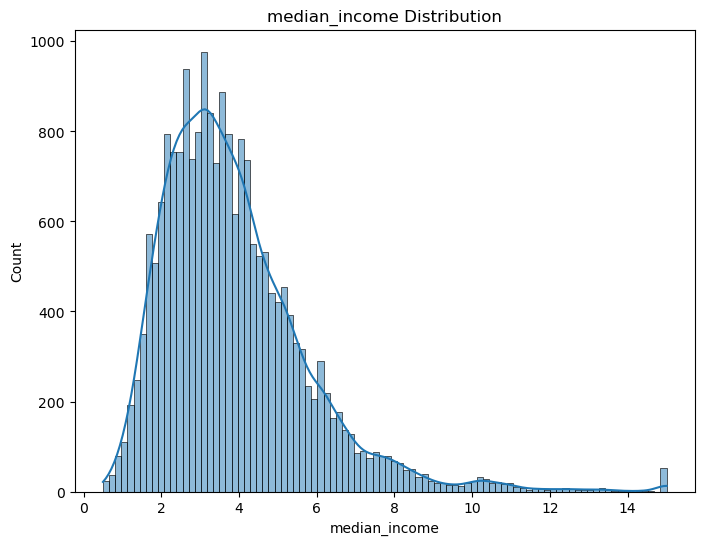

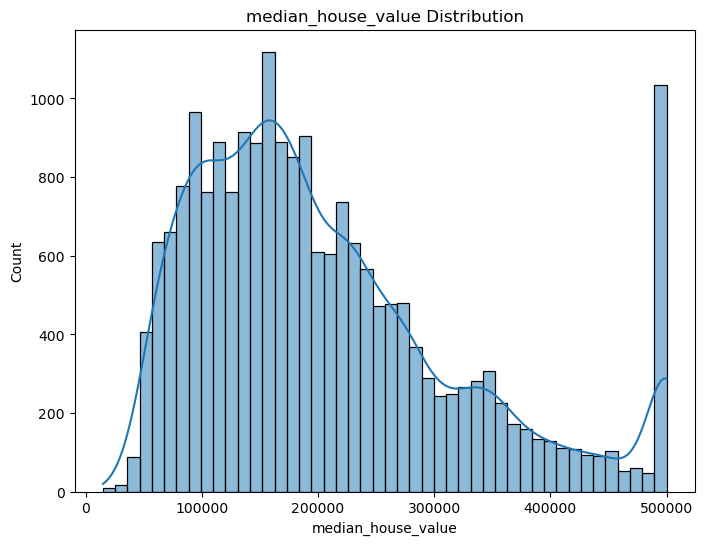

In [121]:
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.show()


In [123]:
correlation_matrix = df_numeric.corr()



In [125]:
print(correlation_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_